<a href="https://colab.research.google.com/github/MagdaSousa/Web_Scraping_utilizando_BeautifulSoup/blob/master/Raspagem_de_dados_com_BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudos BeautifulSoup


Coletando dados da fanpage da série shadowhunters, para estudos .

In [7]:
#vou utilizar para fazer a leitura do html, que será utilizado na raspagem
import urllib.request

In [2]:
from bs4 import BeautifulSoup
#Lib que será utilizada para fazer a raspagem

In [27]:
objeto_criado_com_conteudo_html_do_site = urllib.request.urlopen('https://shadowhunters.fandom.com/pt-br/wiki/Wikia_Shadowhunters_BR').read()
# lendo a página em html, e criando o objeto com o conteúdo da página. Estou utilizando um site de uma série de livros.

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="pt-BR">
<head>
<meta charset="utf-8"/>
<title>Wikia Shadowhunters BR | Fandom</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Wikia_Shadowhunters_BR","wgTitle":"Wikia Shadowhunters BR","wgCurRevisionId":31209,"wgRevisionId":31209,"wgArticleId":4,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikia Shadowhunters BR"],"wgBreakFrames":false,"wgPageContentLanguage":"pt-br","wgPageContentModel":"wikitext","wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro
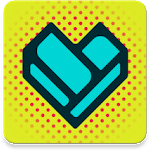
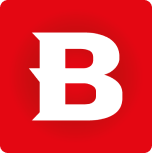

In [28]:
conteudo_coletedo_da_página_html = BeautifulSoup(objeto_criado_com_conteudo_html_do_site, 'html.parser')
print(conteudo_coletedo_da_página_html)

Trabalhando com os nomes das Tags

In [31]:
conteudo_da_tag_section = conteudo_coletedo_da_página_html.section
conteudo_da_tag_section

<section class="wds-global-footer__section wds-is-fandom-overview">
<h3 class="wds-global-footer__section-header">Explorar propriedades</h3>
<ul class="wds-global-footer__links-list">
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.fandom" href="//www.fandom.com/explore-pt-br?uselang=pt-br">
	Fandom</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.gamepedia" href="https://www.gamepedia.com/">
	Gamepedia</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.dnd-beyond" href="https://www.dndbeyond.com/">
	D&amp;D Beyond</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.muthead" href="https://www.muthead.com/">
	Muthead</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-

In [32]:
#renomeando a teg, para shadowhanters
conteudo_da_tag_section.name = 'shadowhanters'
conteudo_da_tag_section
# neste caso a tag que se chamava section, agora ela está com o novo nome

<shadowhanters class="wds-global-footer__section wds-is-fandom-overview">
<h3 class="wds-global-footer__section-header">Explorar propriedades</h3>
<ul class="wds-global-footer__links-list">
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.fandom" href="//www.fandom.com/explore-pt-br?uselang=pt-br">
	Fandom</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.gamepedia" href="https://www.gamepedia.com/">
	Gamepedia</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.dnd-beyond" href="https://www.dndbeyond.com/">
	D&amp;D Beyond</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.muthead" href="https://www.muthead.com/">
	Muthead</a>
</li>
<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link"

Trabalhando com os atributos

In [43]:
conteudo_da_tag_section.li
# Acessando os itens que estão dentro do primeiro item da lista

<li class="wds-global-footer__links-list-item">
<a class="wds-global-footer__link" data-tracking-label="explore.fandom" href="//www.fandom.com/explore-pt-br?uselang=pt-br">
	Fandom</a>
</li>

In [44]:
conteudo_da_tag_section.li.a
#Acessando a linha referente ao link que está dentro da lista

<a class="wds-global-footer__link" data-tracking-label="explore.fandom" href="//www.fandom.com/explore-pt-br?uselang=pt-br">
	Fandom</a>

In [51]:
link =conteudo_da_tag_section.li.a['href']
print(link)
#Depois de ter acessado a lista onde o link se encontra, pego somente o valor do atributo 'href', e imprimo na tela

//www.fandom.com/explore-pt-br?uselang=pt-br


#Utilizando o find_all()

In [56]:
#Aqui vou extrair dotos os itens que contém a tag 'a', e farei um for para extrar somente, os linkes que constam no atributo 'href'.
for link in conteudo_da_tag_section.find_all('a'):
    print(link.get('href'))
# neste caso elá vai filtrar todos os links que estão dentro do objeto que criei, somente com o conteúdo da seção    

//www.fandom.com/explore-pt-br?uselang=pt-br
https://www.gamepedia.com/
https://www.dndbeyond.com/
https://www.muthead.com/
https://www.futhead.com/


[<html class="client-nojs" dir="ltr" lang="pt-BR">
 <head>
 <meta charset="utf-8"/>
 <title>Wikia Shadowhunters BR | Fandom</title>
 <script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
 <script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Wikia_Shadowhunters_BR","wgTitle":"Wikia Shadowhunters BR","wgCurRevisionId":31209,"wgRevisionId":31209,"wgArticleId":4,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikia Shadowhunters BR"],"wgBreakFrames":false,"wgPageContentLanguage":"pt-br","wgPageContentModel":"wikitext","wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro"
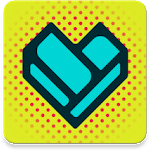
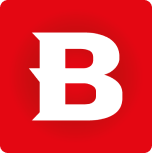
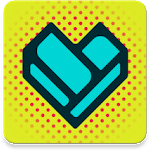
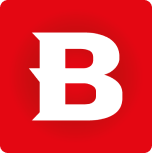

In [96]:
import re
string=re.compile('a')
links = conteudo_coletedo_da_página_html.find_all(string.findall('href'))
links
#O findall () é usado para pesquisar as ocorrências que correspondem a um determinado padrão. 

In [97]:
test =re.search('Gabriel_Lightwood',str(links))
test
# filtrando apenas a linha que contém o padrão

<_sre.SRE_Match object; span=(128899, 128916), match='Gabriel_Lightwood'>

#Pegando apenas o texto da página html

In [104]:
texto = conteudo_coletedo_da_página_html.table.get_text()
print(texto)
#extrair somente o textos, da tag table, sem ter que visualiar as tags





 



 



 



 



 




Cidade dos Ossos

 

Cidade das Cinzas

 

Cidade de Vidro

 

Cidade dos Anjos Caídos

 

Cidade das Almas Perdidas

 

Cidade do Fogo Celestial



In [106]:
# Extrair tag que contém um determinado nome determindado
conteudo_coletedo_da_página_html.find_all(title="Corrente de Espinhos")
#retorna uma lista com o s itens encontrados

[<a href="/pt-br/wiki/Corrente_de_Espinhos" title="Corrente de Espinhos"><img alt="COT cover, teaser 01.jpg" class="lazyload" data-image-key="COT_cover,_teaser_01.jpg" data-image-name="COT cover, teaser 01.jpg" data-src="https://static.wikia.nocookie.net/cacadores-de-sombras/images/2/20/COT_cover%2C_teaser_01.jpg/revision/latest/scale-to-width-down/100?cb=20200612210502&amp;path-prefix=pt-br" decoding="async" height="150" src="data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D" width="100"/></a>,
 <a href="/pt-br/wiki/Corrente_de_Espinhos" title="Corrente de Espinhos"><i>Corrente de Espinhos</i></a>]

In [111]:
#Extrair mais itens de uma vez com o find_all
conteudo_coletedo_da_página_html.find_all(title=["Os Pergaminhos Vermelhos da Magia","Corrente de Ouro"])

[<a href="/pt-br/wiki/Corrente_de_Ouro" title="Corrente de Ouro"><img alt="CdO2 capa 01.jpg" class="lazyload" data-image-key="CdO2_capa_01.jpg" data-image-name="CdO2 capa 01.jpg" data-src="https://static.wikia.nocookie.net/cacadores-de-sombras/images/9/95/CdO2_capa_01.jpg/revision/latest/scale-to-width-down/100?cb=20200526193913&amp;path-prefix=pt-br" decoding="async" height="149" src="data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D" width="100"/></a>,
 <a href="/pt-br/wiki/Os_Pergaminhos_Vermelhos_da_Magia" title="Os Pergaminhos Vermelhos da Magia"><img alt="PVM capa 01.jpg" class="lazyload" data-image-key="PVM_capa_01.jpg" data-image-name="PVM capa 01.jpg" data-src="https://static.wikia.nocookie.net/cacadores-de-sombras/images/d/d3/PVM_capa_01.jpg/revision/latest/scale-to-width-down/100?cb=20191223220225&amp;path-prefix=pt-br" decoding="async" height="151" src="data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3

In [112]:
# acessando o site com o método get do requests
from requests import get
r = get('https://shadowhunters.fandom.com/pt-br/wiki/Wikia_Shadowhunters_BR')

fandom = BeautifulSoup(r.content.decode('utf-8'), "html.parser")
type(fandom)

bs4.BeautifulSoup

In [113]:
fandom.prettify()[:100]
# Raspnado os dados e mostrando as 100 primeiras letras

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="pt-BR">\n <head>\n  <meta charset="utf-8"/>\n'

In [114]:
parametros_busca = {'href': re.compile("^http")}
for link in fandom.find_all('a', attrs=parametros_busca):
    print(link)
# Trazendo as linhas que contém os links com http    

<a data-tracking-label="link.community-central" href="http://comunidade.fandom.com/wiki/Central_da_Comunidade">
	Central da Comunidade</a>
<a class="wds-button wds-is-full-width" data-tracking-label="account.sign-in" href="https://www.fandom.com/signin?uselang=pt-br&amp;redirect=https%3A%2F%2Fshadowhunters.fandom.com%2Fpt-br%2Fwiki%2FWikia_Shadowhunters_BR&amp;selang=pt-br" rel="nofollow">
					Iniciar sessão				</a>
<a class="wds-button wds-is-full-width wds-is-secondary" data-tracking-label="account.register" href="https://www.fandom.com/register?uselang=pt-br&amp;redirect=https%3A%2F%2Fshadowhunters.fandom.com%2Fpt-br%2Fwiki%2FWikia_Shadowhunters_BR&amp;selang=pt-br" rel="nofollow">
					Registre-se				</a>
<a data-tracking="custom-level-3" href="https://community.fandom.com/wiki/c:pt-br.shadowhunterstv:Shadowhunters:_The_Mortal_Instruments">Adaptação Televisiva</a>
<a data-tracking="custom-level-2" href="https://community.fandom.com/wiki/c:pt-br.shadowhunterstv">
												Wiki S

In [118]:
#extraindo somente os links e salvar em um arquivo txt, sem as tags
parametros_busca = {'href': re.compile("^http")}
file = open('shadowhaunters.txt', 'w')
for link in fandom.findAll('a', attrs=parametros_busca):
    link_pagina = str(link.get('href'))
    print(link_pagina)
    file.write(link_pagina)
    file.write('\n')
file.flush()
file.close()

http://comunidade.fandom.com/wiki/Central_da_Comunidade
https://www.fandom.com/signin?uselang=pt-br&redirect=https%3A%2F%2Fshadowhunters.fandom.com%2Fpt-br%2Fwiki%2FWikia_Shadowhunters_BR&selang=pt-br
https://www.fandom.com/register?uselang=pt-br&redirect=https%3A%2F%2Fshadowhunters.fandom.com%2Fpt-br%2Fwiki%2FWikia_Shadowhunters_BR&selang=pt-br
https://community.fandom.com/wiki/c:pt-br.shadowhunterstv:Shadowhunters:_The_Mortal_Instruments
https://community.fandom.com/wiki/c:pt-br.shadowhunterstv
https://community.fandom.com/wiki/c:pt-br.fanonshadowhunters
https://community.fandom.com/wiki/c:pt-br.shadowhunterstv
https://chronikenderunterwelt.fandom.com/de/wiki/
https://the-shadowhunters.fandom.com/el/wiki/
https://shadowhunters.fandom.com/wiki/
https://shadowhunters.fandom.com/es/wiki/
https://shadowhunters.fandom.com/fr/wiki/
https://shadowhunters.fandom.com/hu/wiki/
https://shadowhunters.fandom.com/it/wiki/
https://shadowhunters.fandom.com/nl/wiki/
https://nocni-lowcy.fandom.com/wik

In [131]:
ls
#verificar os arquivos contidos na pasta do diretório

sample_data/  shadowhaunters.txt
